In [ ]:
import yfinance
import numpy
import matplotlib
import pandas


In [ ]:
ticker_symbol = "GC=F"
ticker = yfinance.Ticker(ticker_symbol)
historical_data = ticker.history(period="3y")

In [ ]:
df=pandas.DataFrame()
df['Close']=historical_data['Close']

In [ ]:
df['SMA21']=df['Close'].rolling(window=21).mean()
df['SMA7']=df['Close'].rolling(window=7).mean()
df['MACD']=df['SMA7']-df['SMA21']
df['AVG']=df['MACD'].rolling(window=7).mean()

In [ ]:
df['PLSIGNAL']=numpy.where(df['MACD']-df['AVG'] > 0,1,-1)
df['SIGNAL']=numpy.where(df['MACD']-df['AVG'] > 0,1,0)
df['SIGNAL']=df['SIGNAL'].diff()
df.dropna(inplace=True)

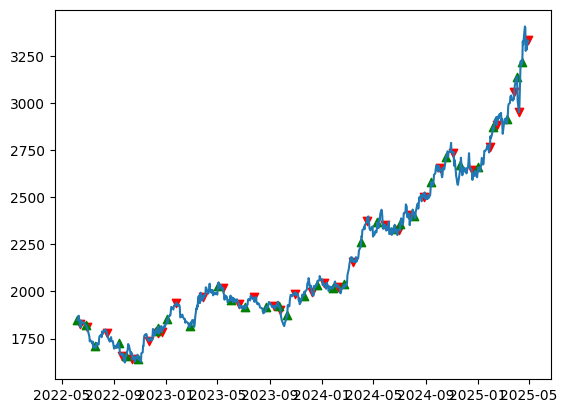

In [ ]:
fig, ax = matplotlib.pyplot.subplots()
ax.plot(df['Close'])
ax.scatter(df[df['SIGNAL'] == -1].index, df[df['SIGNAL'] == -1]['Close'], color='r', marker='v', label='Sell Signal')
ax.scatter(df[df['SIGNAL'] == 1].index, df[df['SIGNAL'] == 1]['Close'], color='g', marker='^', label='Buy Signal')

In [ ]:
EQ=pandas.DataFrame()
EQ['VALUE']=((df['Close']-df['Close'].shift(1))*df['PLSIGNAL']).cumsum()+1000

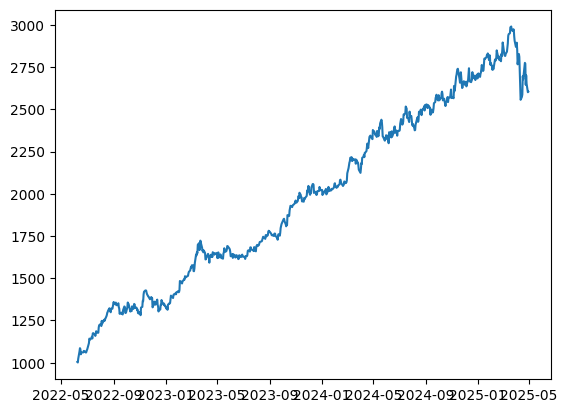

In [ ]:
matplotlib.pyplot.plot(EQ)

In [ ]:
EQ['RETURNS']=numpy.log(EQ['VALUE']/EQ['VALUE'].shift(1))
df['RETURNS']=numpy.log(df['Close']/df['Close'].shift(1))

In [ ]:
beta=EQ['RETURNS'].cov(df['RETURNS'])/df['RETURNS'].var()

In [ ]:
alpha=EQ['RETURNS'].mean()-beta*df['RETURNS'].mean()

In [ ]:
alpha,beta

(np.float64(0.001276887149296231), np.float64(0.04621502451679195))